<a href="https://colab.research.google.com/github/yumi-jun/Data_Analysis/blob/main/%EB%82%A0%EC%A7%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터를 가져와서, 주어진 데이터 속에 날짜 데이터를 가져와, 연도별, 월별, 날짜별로 데이터 통계 그래프를 그려보자

In [1]:
import pandas as pd


In [2]:
df1=pd.read_csv("Data01.csv")
print(df1.shape)
df1.head()

(15000, 7)


,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5
2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19
3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5
4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      15000 non-null  object 
 1   상품명     15000 non-null  object 
 2   바코드     14992 non-null  float64
 3   발주가능상태  15000 non-null  object 
 4   입고수량    15000 non-null  int64  
 5   카테고리    15000 non-null  object 
 6   출고수량    15000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 820.4+ KB


In [4]:
df1['날짜'] #시리즈 (순열)

0        2019-05-16
1        2019-05-16
2        2019-05-16
3        2019-05-16
4        2019-05-16
            ...    
14995    2019-08-07
14996    2019-08-07
14997    2019-08-07
14998    2019-08-07
14999    2019-08-07
Name: 날짜, Length: 15000, dtype: object

날짜 형식으로 변환 -> to_datetime 을 이용하여
Datatype 을 날짜 형식으로 변환

In [6]:
#날짜형식으로 변환
df1['날짜_datetime']=pd.to_datetime(df1['날짜'])
# 새로운 컬럼 날짜_datetime 선언

In [9]:
df1['연도']=df1['날짜_datetime'].dt.year
df1

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime,연도
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16,2019
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16,2019
2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19,2019-05-16,2019
3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5,2019-05-16,2019
4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1,2019-05-16,2019
...,...,...,...,...,...,...,...,...,...
14995,2019-08-07,V2_500,8.801046e+12,발주가능,24,세탁세제,3,2019-08-07,2019
14996,2019-08-07,V2_501,8.801046e+12,발주가능,0,세탁세제,7,2019-08-07,2019
14997,2019-08-07,V2_502,8.801046e+12,발주가능,66,세탁세제,16,2019-08-07,2019
14998,2019-08-07,V2_509,8.801046e+12,발주가능,64,세탁세제,6,2019-08-07,2019


In [14]:
# 특정 열을 기준으로 데이터를 집계하여 요약된 결과를 보여준다.

pd.pivot_table(data=df1,index='연도',values='출고수량',aggfunc='sum')


,출고수량
연도,
2019,108078


In [17]:
df1['월']=df1['날짜_datetime'].dt.month

df1['일자']=df1['날짜_datetime'].dt.day
df1['요일']=df1['날짜_datetime'].dt.day_name()
df1

,날짜,상품명,바코드,발주가능상태,입고수량,카테고리,출고수량,날짜_datetime,연도,월,일자,요일
0,2019-05-16,V2_0,8.801047e+12,발주가능,384,세탁세제,72,2019-05-16,2019,5,16,Thursday
1,2019-05-16,V2_3,8.801047e+12,발주가능,207,세탁세제,5,2019-05-16,2019,5,16,Thursday
2,2019-05-16,V2_7,8.801047e+12,발주가능,520,헤어케어,19,2019-05-16,2019,5,16,Thursday
3,2019-05-16,V2_11,8.801047e+12,발주가능,0,세탁세제,5,2019-05-16,2019,5,16,Thursday
4,2019-05-16,V2_14,8.801046e+12,발주가능,96,세탁세제,1,2019-05-16,2019,5,16,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2019-08-07,V2_500,8.801046e+12,발주가능,24,세탁세제,3,2019-08-07,2019,8,7,Wednesday
14996,2019-08-07,V2_501,8.801046e+12,발주가능,0,세탁세제,7,2019-08-07,2019,8,7,Wednesday
14997,2019-08-07,V2_502,8.801046e+12,발주가능,66,세탁세제,16,2019-08-07,2019,8,7,Wednesday
14998,2019-08-07,V2_509,8.801046e+12,발주가능,64,세탁세제,6,2019-08-07,2019,8,7,Wednesday


<Axes: xlabel='월'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  f

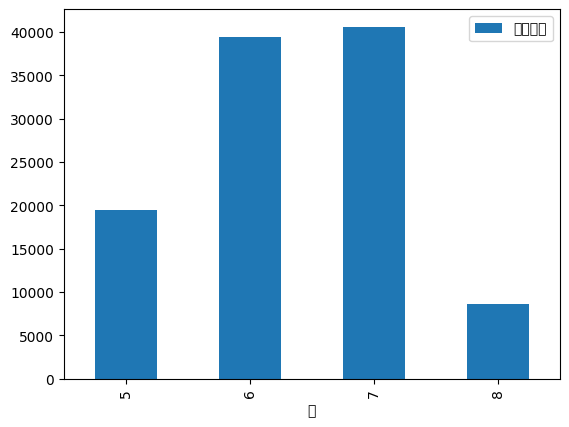

In [19]:
pd.pivot_table(data=df1,index='월',values='출고수량',aggfunc='sum').plot(kind='bar')

In [20]:
df2=pd.read_csv("Data02.csv")
print(df2.shape)
df2.head()

(46749, 9)


,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231


In [21]:
df2['배송시작일']

0         2019-01-07 오전 8:56
1         2019-01-03 오전 9:30
2         2019-01-03 오전 9:30
3         2019-01-03 오전 9:30
4         2019-01-07 오전 8:56
                ...         
46744     2017-12-29 오후 4:32
46745     2018-01-03 오전 9:45
46746     2018-01-02 오후 7:06
46747     2018-01-03 오후 2:00
46748    2018-01-03 오후 12:43
Name: 배송시작일, Length: 46749, dtype: object

In [22]:
pd.to_datetime(df2['배송시작일'])
#

<ipython-input-22-da125b0545b3>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df2['배송시작일'])


DateParseError: Unknown datetime string format, unable to parse: 2019-01-07 오전 8:56, at position 0

In [33]:
def date_function(x):
  return x[0:10]

df2['배송시작일(datetime)']=pd.to_datetime(df2['배송시작일'].apply(date_function))
df2['배송완료일(datetime)']=pd.to_datetime(df2['배송완료일'].apply(date_function))
df2

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,배송시작일(datetime),배송완료일(datetime)
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227,2019-01-07,2019-01-11
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229,2019-01-03,2019-01-07
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230,2019-01-03,2019-01-07
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231,2019-01-03,2019-01-07
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231,2019-01-07,2019-01-11
...,...,...,...,...,...,...,...,...,...,...,...
46744,카드,D-20171229-0000036-00,2017-12-29 오후 4:32,2018-01-02 오전 5:31,52800,445.0,1,모바일웹,20171229,2017-12-29,2018-01-02
46745,카드,D-20171229-0000043-00,2018-01-03 오전 9:45,2018-01-07 오전 5:38,112200,172.0,2,모바일웹,20171229,2018-01-03,2018-01-07
46746,카드,D-20171230-0000022-01,2018-01-02 오후 7:06,2018-01-11 오전 2:46,36000,140.0,1,네이버 페이,20171230,2018-01-02,2018-01-11
46747,카드,D-20171231-0000017-01,2018-01-03 오후 2:00,2018-01-06 오후 6:06,73460,184.0,1,네이버 페이,20171231,2018-01-03,2018-01-06


In [34]:
pd.pivot_table(data=df2,index='배송시작일(datetime)',values='배송완료일',aggfunc='count')

,배송완료일
배송시작일(datetime),
2017-01-17,1
2017-01-19,2
2017-01-23,1
2017-02-02,1
2017-02-07,1
...,...
2019-06-10,5
2019-06-14,1
2019-06-17,1


In [38]:
df2['배송시간']=df2['배송완료일(datetime)']-df2['배송시작일(datetime)']
df2['배송시간'].describe()

count                        46749
mean     4 days 04:38:57.008278251
std      1 days 04:56:12.144368428
min                0 days 00:00:00
25%                4 days 00:00:00
50%                4 days 00:00:00
75%                4 days 00:00:00
max               47 days 00:00:00
Name: 배송시간, dtype: object

In [39]:
df2['주문일']

0        20181227
1        20181229
2        20181230
3        20181231
4        20181231
           ...   
46744    20171229
46745    20171229
46746    20171230
46747    20171231
46748    20171231
Name: 주문일, Length: 46749, dtype: int64

In [41]:
def date_function2(x):
  result=str(x)
  return result[0:4]+'-'+result[4:6]+'-'+result[6:8]

df2['주문일'].apply(date_function2)

0        2018-12-27
1        2018-12-29
2        2018-12-30
3        2018-12-31
4        2018-12-31
            ...    
46744    2017-12-29
46745    2017-12-29
46746    2017-12-30
46747    2017-12-31
46748    2017-12-31
Name: 주문일, Length: 46749, dtype: object